In [1]:
import warnings; warnings.filterwarnings("ignore");
import time
start_time = time.time()

In [2]:
import numpy as np
import pandas as pd
from sklearn import ensemble
#from sklearn import pipeline, model_selection
from sklearn import pipeline, grid_search
#from sklearn.feature_extraction import DictVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import TruncatedSVD
#from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn import cross_validation
from sklearn import preprocessing
#stemmer = SnowballStemmer('english')
import re
#import enchant
import random
random.seed(2016)

from nltk.stem.porter import *
stemmer = PorterStemmer()

In [3]:
import sys 
reload(sys)  
sys.setdefaultencoding('utf8')

In [35]:
df_train = pd.read_csv('data/train.csv', encoding= 'iso-8859-1') #update here
df_test = pd.read_csv('data/test.csv', encoding='iso-8859-1') #update here
df_pro_desc = pd.read_csv('data/product_descriptions.csv') #update here
df_attr = pd.read_csv('data/attributes.csv')
df_attr.dropna(inplace=True)
df_train['label'] = 'train'
df_test['label'] = 'test'

In [36]:
df_brand = df_attr[df_attr.name == "MFG Brand Name"][["product_uid", "value"]].rename(columns={"value": "brand"})
df_material = df_attr[df_attr.name == "Material"][["product_uid", "value"]].rename(columns={"value": "brand"})

In [6]:
num_train = df_train.shape[0]
df_all = pd.concat((df_train, df_test), axis=0, ignore_index=True)

In [7]:
df_all = pd.merge(df_all, df_pro_desc, how='left', on='product_uid')
df_all = pd.merge(df_all, df_brand, how='left', on='product_uid')

In [8]:
df_material = df_attr[df_attr.name.str.lower().str.contains('material')][["product_uid", "value"]].rename(columns={"value": "material"})

In [9]:
row_to_drop = []
df_material['lable'] = 0
for i in range(len(df_material.product_uid)):
    if df_material.product_uid.iloc[i] == df_material.product_uid.iloc[i+1]:
        if df_material.material.iloc[i]!= df_material.material.iloc[i+1]:
            df_material.material.iloc[i] = df_material.material.iloc[i]+' '+df_material.material.iloc[i+1]
        df_material.lable.iloc[i+1] = 1
        
        if df_material.product_uid.iloc[i] == df_material.product_uid.iloc[i+2]:
            if df_material.material.iloc[i]!= df_material.material.iloc[i+2]:
                df_material.material.iloc[i] = df_material.material.iloc[i]+' '+df_material.material.iloc[i+2]
            df_material.lable.iloc[i+2] = 1
        
            if df_material.product_uid.iloc[i] == df_material.product_uid.iloc[i+3]:
                if df_material.material.iloc[i]!= df_material.material.iloc[i+3]:
                    df_material.material.iloc[i] = df_material.material.iloc[i]+' '+df_material.material.iloc[i+3]
                df_material.lable.iloc[i+3] = 1
    else:
        print i        

IndexError: single positional indexer is out-of-bounds

In [29]:
df_all.shape

(240760, 10)

In [11]:
df_material = df_material[df_material.lable == 0]
df_material= df_material.drop('lable', 1)

In [12]:
df_all = pd.merge(df_all, df_material, how='left', on='product_uid')

In [15]:
df_color = df_attr[df_attr.name.str.lower().str.contains('color')][["product_uid", "value"]].rename(columns={"value": "color"})

In [22]:
df_color['lable'] = 0
for i in range(len(df_color.product_uid)):
    if df_color.product_uid.iloc[i] == df_color.product_uid.iloc[i+1]:
        if df_color.color.iloc[i]!= df_color.color.iloc[i+1]:
            df_color.color.iloc[i] = df_color.color.iloc[i]+' '+df_color.color.iloc[i+1]
        df_color.lable.iloc[i+1] = 1
        
        if df_color.product_uid.iloc[i] == df_color.product_uid.iloc[i+2]:
            if df_color.color.iloc[i]!= df_color.color.iloc[i+2]:
                df_color.color.iloc[i] = df_color.color.iloc[i]+' '+df_color.color.iloc[i+2]
            df_color.lable.iloc[i+2] = 1
            
            if df_color.product_uid.iloc[i] == df_color.product_uid.iloc[i+3]:
                if df_color.color.iloc[i]!= df_color.color.iloc[i+3]:
                    df_color.color.iloc[i] = df_color.color.iloc[i]+' '+df_color.color.iloc[i+3]
                df_color.lable.iloc[i+3] = 1
                
                if df_color.product_uid.iloc[i] == df_color.product_uid.iloc[i+4]:
                    if df_color.color.iloc[i]!= df_color.color.iloc[i+4]:
                        df_color.color.iloc[i] = df_color.color.iloc[i]+' '+df_color.color.iloc[i+4]
                    df_color.lable.iloc[i+4] = 1
                    
                    if df_color.product_uid.iloc[i] == df_color.product_uid.iloc[i+5]:
                        if df_color.color.iloc[i]!= df_color.color.iloc[i+5]:
                            df_color.color.iloc[i] = df_color.color.iloc[i]+' '+df_color.color.iloc[i+5]
                        df_color.lable.iloc[i+5] = 1
                        
                        if df_color.product_uid.iloc[i] == df_color.product_uid.iloc[i+6]:
                            if df_color.color.iloc[i]!= df_color.color.iloc[i+6]:
                                df_color.color.iloc[i] = df_color.color.iloc[i]+' '+df_color.color.iloc[i+6]
                            df_color.lable.iloc[i+6] = 1
                            
                            if df_color.product_uid.iloc[i] == df_color.product_uid.iloc[i+7]:
                                if df_color.color.iloc[i]!= df_color.color.iloc[i+7]:
                                    df_color.color.iloc[i] = df_color.color.iloc[i]+' '+df_color.color.iloc[i+7]
                                df_color.lable.iloc[i+7] = 1
        
        
    else:
        print i        

IndexError: single positional indexer is out-of-bounds

In [24]:
df_color = df_color[df_color.lable == 0]
df_color= df_color.drop('lable', 1)

In [25]:
df_color.shape

(55693, 2)

In [26]:
df_all = pd.merge(df_all, df_color, how='left', on='product_uid')

In [12]:
#type(df_all.product_title[0])

In [30]:
stop_w = ['for', 'xbi', 'and', 'in', 'th','on','sku','with','what','from','that','less','er','ing'] #'electr','paint','pipe','light','kitchen','wood','outdoor','door','bathroom'
strNum = {'zero':0,'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9}

In [31]:
def str_stem(s): 
    if isinstance(s, unicode):
        s = re.sub(r"(\w)\.([A-Z])", r"\1 \2", s) #Split words with a.A
        s = s.lower()
        s = s.replace("  "," ")
        s = s.replace(",","") #could be number / segment later
        s = s.replace("$"," ")
        s = s.replace("?"," ")
        s = s.replace("-"," ")
        s = s.replace("//","/")
        s = s.replace("..",".")
        s = s.replace(" / "," ")
        s = s.replace(" \\ "," ")
        s = s.replace("."," . ")
        s = re.sub(r"(^\.|/)", r"", s)
        s = re.sub(r"(\.|/)$", r"", s)
        s = re.sub(r"([0-9])([a-z])", r"\1 \2", s)
        s = re.sub(r"([a-z])([0-9])", r"\1 \2", s)
        s = s.replace(" x "," xbi ")
        s = re.sub(r"([a-z])( *)\.( *)([a-z])", r"\1 \4", s)
        s = re.sub(r"([a-z])( *)/( *)([a-z])", r"\1 \4", s)
        s = s.replace("*"," xbi ")
        s = s.replace(" by "," xbi ")
        s = re.sub(r"([0-9])( *)\.( *)([0-9])", r"\1.\4", s)
        s = re.sub(r"([0-9]+)( *)(inches|inch|in|')\.?", r"\1in. ", s)
        s = re.sub(r"([0-9]+)( *)(foot|feet|ft|'')\.?", r"\1ft. ", s)
        s = re.sub(r"([0-9]+)( *)(pounds|pound|lbs|lb)\.?", r"\1lb. ", s)
        s = re.sub(r"([0-9]+)( *)(square|sq) ?\.?(feet|foot|ft)\.?", r"\1sq.ft. ", s)
        s = re.sub(r"([0-9]+)( *)(cubic|cu) ?\.?(feet|foot|ft)\.?", r"\1cu.ft. ", s)
        s = re.sub(r"([0-9]+)( *)(gallons|gallon|gal)\.?", r"\1gal. ", s)
        s = re.sub(r"([0-9]+)( *)(ounces|ounce|oz)\.?", r"\1oz. ", s)
        s = re.sub(r"([0-9]+)( *)(centimeters|cm)\.?", r"\1cm. ", s)
        s = re.sub(r"([0-9]+)( *)(milimeters|mm)\.?", r"\1mm. ", s)
        s = s.replace("°"," degrees ")
        s = re.sub(r"([0-9]+)( *)(degrees|degree)\.?", r"\1deg. ", s)
        s = s.replace(" v "," volts ")
        s = re.sub(r"([0-9]+)( *)(volts|volt)\.?", r"\1volt. ", s)
        s = re.sub(r"([0-9]+)( *)(watts|watt)\.?", r"\1watt. ", s)
        s = re.sub(r"([0-9]+)( *)(amperes|ampere|amps|amp)\.?", r"\1amp. ", s)
        s = s.replace("  "," ")
        s = s.replace(" . "," ")
        s = (" ").join([z for z in s.split(" ") if z not in stop_w])
        s = (" ").join([str(strNum[z]) if z in strNum else z for z in s.split(" ")])
        s = (" ").join([stemmer.stem(z) for z in s.split(" ")])
        
        s = s.lower()
        s = s.replace("toliet","toilet")
        s = s.replace("airconditioner","air conditioner")
        s = s.replace("vinal","vinyl")
        s = s.replace("vynal","vinyl")
        s = s.replace("skill","skil")
        s = s.replace("snowbl","snow bl")
        s = s.replace("plexigla","plexi gla")
        s = s.replace("rustoleum","rust-oleum")
        s = s.replace("whirpool","whirlpool")
        s = s.replace("whirlpoolga", "whirlpool ga")
        s = s.replace("whirlpoolstainless","whirlpool stainless")
        return s
    
    elif isinstance(s, str):
        s = re.sub(r"(\w)\.([A-Z])", r"\1 \2", s) #Split words with a.A
        s = s.lower()
        s = s.replace("  "," ")
        s = s.replace(",","") #could be number / segment later
        s = s.replace("$"," ")
        s = s.replace("?"," ")
        s = s.replace("-"," ")
        s = s.replace("//","/")
        s = s.replace("..",".")
        s = s.replace(" / "," ")
        s = s.replace(" \\ "," ")
        s = s.replace("."," . ")
        s = re.sub(r"(^\.|/)", r"", s)
        s = re.sub(r"(\.|/)$", r"", s)
        s = re.sub(r"([0-9])([a-z])", r"\1 \2", s)
        s = re.sub(r"([a-z])([0-9])", r"\1 \2", s)
        s = s.replace(" x "," xbi ")
        s = re.sub(r"([a-z])( *)\.( *)([a-z])", r"\1 \4", s)
        s = re.sub(r"([a-z])( *)/( *)([a-z])", r"\1 \4", s)
        s = s.replace("*"," xbi ")
        s = s.replace(" by "," xbi ")
        s = re.sub(r"([0-9])( *)\.( *)([0-9])", r"\1.\4", s)
        s = re.sub(r"([0-9]+)( *)(inches|inch|in|')\.?", r"\1in. ", s)
        s = re.sub(r"([0-9]+)( *)(foot|feet|ft|'')\.?", r"\1ft. ", s)
        s = re.sub(r"([0-9]+)( *)(pounds|pound|lbs|lb)\.?", r"\1lb. ", s)
        s = re.sub(r"([0-9]+)( *)(square|sq) ?\.?(feet|foot|ft)\.?", r"\1sq.ft. ", s)
        s = re.sub(r"([0-9]+)( *)(cubic|cu) ?\.?(feet|foot|ft)\.?", r"\1cu.ft. ", s)
        s = re.sub(r"([0-9]+)( *)(gallons|gallon|gal)\.?", r"\1gal. ", s)
        s = re.sub(r"([0-9]+)( *)(ounces|ounce|oz)\.?", r"\1oz. ", s)
        s = re.sub(r"([0-9]+)( *)(centimeters|cm)\.?", r"\1cm. ", s)
        s = re.sub(r"([0-9]+)( *)(milimeters|mm)\.?", r"\1mm. ", s)
        s = s.replace("°"," degrees ")
        s = re.sub(r"([0-9]+)( *)(degrees|degree)\.?", r"\1deg. ", s)
        s = s.replace(" v "," volts ")
        s = re.sub(r"([0-9]+)( *)(volts|volt)\.?", r"\1volt. ", s)
        s = re.sub(r"([0-9]+)( *)(watts|watt)\.?", r"\1watt. ", s)
        s = re.sub(r"([0-9]+)( *)(amperes|ampere|amps|amp)\.?", r"\1amp. ", s)
        s = s.replace("  "," ")
        s = s.replace(" . "," ")
        s = (" ").join([z for z in s.split(" ") if z not in stop_w])
        s = (" ").join([str(strNum[z]) if z in strNum else z for z in s.split(" ")])
        s = (" ").join([stemmer.stem(z) for z in s.split(" ")])
        
        s = s.lower()
        s = s.replace("toliet","toilet")
        s = s.replace("airconditioner","air conditioner")
        s = s.replace("vinal","vinyl")
        s = s.replace("vynal","vinyl")
        s = s.replace("skill","skil")
        s = s.replace("snowbl","snow bl")
        s = s.replace("plexigla","plexi gla")
        s = s.replace("rustoleum","rust-oleum")
        s = s.replace("whirpool","whirlpool")
        s = s.replace("whirlpoolga", "whirlpool ga")
        s = s.replace("whirlpoolstainless","whirlpool stainless")
        return s
    
    else:
        return "null"


In [32]:
def seg_words(str1, str2):
    str2 = str2.lower()
    str2 = re.sub("[^a-z0-9./]"," ", str2)
    str2 = [z for z in set(str2.split()) if len(z)>2]
    words = str1.lower().split(" ")
    s = []
    for word in words:
        if len(word)>3:
            s1 = []
            s1 += segmentit(word,str2,True)
            if len(s)>1:
                s += [z for z in s1 if z not in ['er','ing','s','less'] and len(z)>1]
            else:
                s.append(word)
        else:
            s.append(word)
    return (" ".join(s))

In [33]:
def segmentit(s, txt_arr, t):
    st = s
    r = []
    for j in range(len(s)):
        for word in txt_arr:
            if word == s[:-j]:
                r.append(s[:-j])
                print(s[:-j],s[len(s)-j:])
                s=s[len(s)-j:]
                r += segmentit(s, txt_arr, False)
    if t:
        i = len(("").join(r))
        if not i==len(st):
            r.append(st[i:])
    return r

In [34]:
def str_common_word(str1, str2):
    words, cnt = str1.split(), 0
    for word in words:
        if str2.find(word)>=0:
            cnt+=1
    return cnt

In [35]:
def str_whole_word(str1, str2, i_):
    cnt = 0
    while i_ < len(str2):
        i_ = str2.find(str1, i_)
        if i_ == -1:
            return cnt
        else:
            cnt += 1
            i_ += len(str1)
    return cnt

In [36]:
def len_cal(x):
    if x == 'nan':
        return 0
    else:
        return len(x.split())

In [37]:
df_all['search_term'] = df_all['search_term'].map(lambda x:str_stem(x))
df_all['product_title'] = df_all['product_title'].map(lambda x:str_stem(x))

In [38]:
df_all['product_description'] = df_all['product_description'].map(lambda x:str_stem(x))

In [39]:
df_all['brand'] = df_all['brand'].astype('unicode').map(lambda x:str_stem(x))
df_all['material'] = df_all['material'].astype('unicode').map(lambda x:str_stem(x))
df_all['color'] = df_all['color'].astype('unicode').map(lambda x:str_stem(x))

In [40]:
df_all['product_info'] = df_all['search_term']+"\t"+df_all['product_title'] +"\t"+df_all['product_description']

In [41]:
df_all['len_of_query'] = df_all['search_term'].map(lambda x:len(x.split())).astype(np.int64)
df_all['len_of_title'] = df_all['product_title'].map(lambda x:len(x.split())).astype(np.int64)
df_all['len_of_description'] = df_all['product_description'].map(lambda x:len(x.split())).astype(np.int64)

In [42]:
df_all['len_of_brand'] = df_all['brand'].map(lambda x:len(x.split())).astype(np.int64)

In [43]:
df_all['len_of_material'] = df_all['material'].map(lambda x:len(x.split())).astype(np.int64)

In [44]:
df_all['len_of_color'] = df_all['color'].map(lambda x:len(x.split())).astype(np.int64)

In [45]:
df_all['search_term'] = df_all['product_info'].map(lambda x:seg_words(x.split('\t')[0],x.split('\t')[1]))
#df_all = df_all.drop('search_term1',1)

In [46]:
df_all['query_in_title'] = df_all['product_info'].map(lambda x:str_whole_word(x.split('\t')[0],x.split('\t')[1],0))
df_all['query_in_description'] = df_all['product_info'].map(lambda x:str_whole_word(x.split('\t')[0],x.split('\t')[2],0))

In [47]:
df_all['query_last_word_in_title'] = df_all['product_info'].map(lambda x:str_common_word(x.split('\t')[0].split(" ")[-1],x.split('\t')[1]))
df_all['query_last_word_in_description'] = df_all['product_info'].map(lambda x:str_common_word(x.split('\t')[0].split(" ")[-1],x.split('\t')[2]))

In [48]:
df_all['word_in_title'] = df_all['product_info'].map(lambda x:str_common_word(x.split('\t')[0],x.split('\t')[1]))
df_all['word_in_description'] = df_all['product_info'].map(lambda x:str_common_word(x.split('\t')[0],x.split('\t')[2]))

In [49]:
df_all['ratio_title'] = df_all['word_in_title']/df_all['len_of_query']
df_all['ratio_description'] = df_all['word_in_description']/df_all['len_of_query']

In [50]:
df_all['attr'] = df_all['search_term']+"\t"+df_all['brand']+'\t'+df_all['material']+'\t'+df_all['color']
df_all['word_in_brand'] = df_all['attr'].map(lambda x:str_common_word(x.split('\t')[0],x.split('\t')[1]))
df_all['word_in_material'] = df_all['attr'].map(lambda x:str_common_word(x.split('\t')[0],x.split('\t')[2]))
df_all['word_in_color'] = df_all['attr'].map(lambda x:str_common_word(x.split('\t')[0],x.split('\t')[3]))

In [140]:
df_all['ratio_brand'] = df_all['word_in_brand']/df_all['len_of_brand']
df_all['ratio_material'] = df_all['word_in_material']/df_all['len_of_material']

In [138]:
df_all['ratio_color'] = df_all['word_in_color']/df_all['len_of_color']

In [147]:
#df_all['len_of_brand'] = df_all['brand'].map(lambda x: len_cal(x)).astype(np.int64)
#df_all['len_of_material'] = df_all['material'].map(lambda x: len_cal(x)).astype(np.int64)

In [158]:
#df_all.ix[:,9:]

In [48]:
df_brand = pd.unique(df_all.brand.ravel())
df_material = pd.unique(df_all.material.ravel())
df_color = pd.unique(df_all.color.ravel())

In [49]:
d_brand={}
i = 1
for s in df_brand:
    d_brand[s]=i
    i+=1

In [50]:
d_material={}
i = 1
for s in df_material:
    d_material[s]=i
    i+=1

In [51]:
d_color={}
i = 1
for s in df_color:
    d_color[s]=i
    i+=1

In [52]:
df_all['brand_feature'] = df_all['brand'].map(lambda x:d_brand[x])
df_all['material_feature'] = df_all['material'].map(lambda x:d_material[x])
df_all['color_feature'] = df_all['color'].map(lambda x:d_color[x])

In [53]:
df_all['search_term_feature'] = df_all['search_term'].map(lambda x:len(x))

In [55]:
df_all.shape

(240760, 36)

In [54]:
df_all.to_csv('df_all.csv')

In [4]:
#df_all.iloc[0]

In [7]:
df_all = pd.read_csv('features/df_all.csv', encoding="ISO-8859-1", index_col=0)
#df_all = df_all.fillna('nan')

In [57]:
#df_all['all_info'] = df_all['search_term']+' '+df_all['product_title']+' '+df_all['product_description']+' '+df_all['material']+' '+df_all['brand']

In [8]:
df_train = df_all[df_all.label == 'train']
df_test = df_all[df_all.label == 'test']
id_test = df_test['id']
y_train = df_train['relevance'].values
X_train =df_train[:]
X_test = df_test[:]
print("--- Features Set: %s minutes ---" % round(((time.time() - start_time)/60),2))

In [9]:
X_train = X_train.drop('label', 1)
X_test = X_test.drop('label',1)

In [34]:
#df_all.iloc[0]

In [10]:
def fmean_squared_error(ground_truth, predictions):
    fmean_squared_error_ = mean_squared_error(ground_truth, predictions)**0.5
    return fmean_squared_error_

RMSE  = make_scorer(fmean_squared_error, greater_is_better=False)

class cust_regression_vals(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self
    def transform(self, hd_searches):
        d_col_drops=['id','relevance','search_term','product_title','product_description','product_info','attr','brand','material','color']
    
        hd_searches = hd_searches.drop(d_col_drops,axis=1).values
        return hd_searches

class cust_txt_col(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
    def fit(self, x, y=None):
        return self
    def transform(self, data_dict):
        return data_dict[self.key].apply(str)

In [27]:
rfr = ensemble.RandomForestRegressor(n_estimators = 500, n_jobs = -1, random_state = 2016, verbose = 1)
tfidf = TfidfVectorizer(ngram_range=(1, 3), stop_words='english')
tsvd = TruncatedSVD(n_components=30, random_state = 2016)

In [28]:
clf = pipeline.Pipeline([
        ('union', FeatureUnion(
                    transformer_list = [
                        ('cst',  cust_regression_vals()),  
                        ('txt1', pipeline.Pipeline([('s1', cust_txt_col(key='search_term')), ('tfidf1', tfidf), ('tsvd1', tsvd)])),
                        ('txt2', pipeline.Pipeline([('s2', cust_txt_col(key='product_title')), ('tfidf2', tfidf), ('tsvd2', tsvd)])),
                        ('txt3', pipeline.Pipeline([('s3', cust_txt_col(key='product_description')), ('tfidf3', tfidf), ('tsvd3', tsvd)])),
                        ('txt4', pipeline.Pipeline([('s4', cust_txt_col(key='brand')), ('tfidf4', tfidf), ('tsvd4', tsvd)])),
                        ('txt5', pipeline.Pipeline([('s5', cust_txt_col(key='material')), ('tfidf5', tfidf), ('tsvd5', tsvd)])),
                        ('txt6', pipeline.Pipeline([('s6', cust_txt_col(key='color')), ('tfidf6', tfidf), ('tsvd6', tsvd)]))
                        ],
                    transformer_weights = {
                        'cst': 1,
                        'txt1': 0.5,
                        'txt2': 0.25,
                        'txt3': 0.25,
                        'txt4': 0.5,
                        'txt5': 0.25,
                        'txt6': 0.25
                        },
                #n_jobs = -1
                )),])

In [40]:
df_all

,id,label,product_title,product_uid,relevance,search_term,product_description,brand,material,color,...,word_in_brand,word_in_material,word_in_color,ratio_brand,ratio_material,ratio_color,brand_feature,material_feature,color_feature,search_term_feature
0,2,train,simpson strong tie 12 gaug angl,100001,3.00,angl bracket,not onli do angl make joint stronger they also...,simpson strong tie,galvan steel,NaN,...,0,0,0,0.000000,0.00,0.000000,1,1,1,12
1,3,train,simpson strong tie 12 gaug angl,100001,2.50,l bracket,not onli do angl make joint stronger they also...,simpson strong tie,galvan steel,NaN,...,0,1,0,0.000000,0.50,0.000000,1,1,1,9
2,9,train,behr premium textur deckov 1gal. #sc 141 tugbo...,100002,3.00,deck over,behr premium textur deckov is an innov solid c...,behr premium textur deckov,NaN,brown tan tugboat,...,1,0,0,0.250000,0.00,0.000000,2,2,2,9
3,16,train,delta vero 1 handl shower onli faucet trim kit...,100005,2.33,rain shower head,updat your bathroom the delta vero singl handl...,delta,NaN,chrome,...,0,0,0,0.000000,0.00,0.000000,3,2,3,16
4,17,train,delta vero 1 handl shower onli faucet trim kit...,100005,2.67,shower onli faucet,updat your bathroom the delta vero singl handl...,delta,NaN,chrome,...,0,0,0,0.000000,0.00,0.000000,3,2,3,18
5,18,train,whirlpool 1.9cu.ft. over the rang convect micr...,100006,3.00,convect otr,achiev delici result is almost effortless thi ...,whirlpool,NaN,stainless steel stainless,...,0,0,0,0.000000,0.00,0.000000,4,2,4,11
6,20,train,whirlpool 1.9cu.ft. over the rang convect micr...,100006,2.67,microwav over stove,achiev delici result is almost effortless thi ...,whirlpool,NaN,stainless steel stainless,...,0,0,0,0.000000,0.00,0.000000,4,2,4,19
7,21,train,whirlpool 1.9cu.ft. over the rang convect micr...,100006,3.00,microwav,achiev delici result is almost effortless thi ...,whirlpool,NaN,stainless steel stainless,...,0,0,0,0.000000,0.00,0.000000,4,2,4,8
8,23,train,lithonia light quantum 2 light black led emerg...,100007,2.67,emerg light,the quantum adjust 2 light led black emerg lig...,lithonia light,plastic,black,...,1,0,0,0.500000,0.00,0.000000,5,3,5,11
9,27,train,hous of fara 34in. 3in. 8ft. mdf flute case,100009,3.00,mdf 34,get the hous of fara 34in. 3in. 8ft. mdf flute...,hous of fara,medium densiti fiberboard (mdf),white,...,0,1,0,0.000000,0.25,0.000000,6,4,6,6


In [29]:
clf.fit(X_train)

Pipeline(steps=[('union', FeatureUnion(n_jobs=1,
       transformer_list=[('cst', cust_regression_vals()), ('txt1', Pipeline(steps=[('s1', cust_txt_col(key='search_term')), ('tfidf1', TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8'...ghts={'txt5': 0.25, 'txt4': 0.5, 'cst': 1, 'txt6': 0.25, 'txt1': 0.5, 'txt2': 0.25, 'txt3': 0.25}))])

In [30]:
DF_TRAIN = clf.transform(X_train)
DF_TEST = clf.transform(X_test)

In [80]:
rfr.fit(DF_TRAIN, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=2016,
           verbose=1, warm_start=False)

In [50]:
from sklearn import feature_selection

In [81]:
sel = feature_selection.SelectFromModel(rfr, threshold = 'mean', prefit = True)
DF_TRAIN_ADV = sel.transform(DF_TRAIN)

In [82]:
DF_TEST_ADV = sel.transform(DF_TEST)

In [36]:
rfr_mod = ensemble.RandomForestRegressor(n_estimators = 500, n_jobs = -1, random_state = 2016, verbose = 1,max_depth=20,max_features=30)
rfr_mod.fit(DF_TRAIN,y_train)

#y_pred = rfr_mod.predict(DF_TEST)
#pd.DataFrame({"id": id_test, "relevance": y_pred}).to_csv('submission_1gram_0.465.csv',index=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=2016,
           verbose=1, warm_start=False)

In [32]:
X_train.iloc[0]

id                                                                                2
product_title                                       simpson strong tie 12 gaug angl
product_uid                                                                  100001
relevance                                                                         3
search_term                                                            angl bracket
product_description               not onli do angl make joint stronger they also...
brand                                                            simpson strong tie
material                                                               galvan steel
color                                                                           NaN
product_info                      angl bracket\tsimpson strong tie 12 gaug angl\...
len_of_query                                                                      2
len_of_title                                                                

In [39]:
rfr_mod.feature_importances_

array([  4.09671340e-02,   6.12269965e-03,   1.07332649e-02,
         1.20586821e-02,   1.65729670e-03,   6.82800972e-04,
         7.58714927e-04,   1.11209571e-03,   1.01623291e-03,
         1.88278952e-03,   2.06083527e-03,   4.61039126e-03,
         3.10303778e-03,   1.92421546e-01,   2.08354878e-02,
         6.79187058e-04,   2.07420688e-04,   3.12011116e-04,
         1.54396742e-03,   4.17670627e-04,   6.64316038e-04,
         1.11524906e-02,   3.13680950e-03,   2.77464239e-03,
         3.55182064e-02,   0.00000000e+00,   2.35150116e-03,
         3.41070408e-03,   3.49892931e-03,   2.85422419e-03,
         2.54405591e-03,   3.02315117e-03,   3.77021009e-03,
         3.60770299e-03,   4.18052636e-03,   3.94972723e-03,
         3.62354830e-03,   3.87881641e-03,   4.03105743e-03,
         4.61397690e-03,   2.56963231e-03,   3.65033066e-03,
         3.78419838e-03,   3.82967584e-03,   3.46672498e-03,
         3.44198036e-03,   3.79122425e-03,   4.19477574e-03,
         4.08964425e-03,

In [ ]:
param_grid = {'max_features': [10,20,30,40,50,60,70], 'max_depth': [20,30,40]}
model = grid_search.GridSearchCV(estimator = rfr, param_grid = param_grid, n_jobs = -1, cv = 3, verbose = 20, scoring=RMSE)
model.fit(DF_TRAIN, y_train)

print(model.best_params_)
print(model.best_score_)

In [26]:
cross_validation.cross_val_score(rfr_mod, DF_TRAIN, y_train,scoring=RMSE,cv=5).mean()

-0.46544558389981255

In [15]:
from sklearn import tree

In [28]:
DF_TRAIN_EXTRA = clf.transform(X_train)
DF_TEST_EXTRA = clf.transform(X_test)

In [31]:
extra_mod = ensemble.ExtraTreesRegressor(n_estimators = 500, n_jobs = -1, random_state = 2016, verbose = 1,max_features=45,
                                      max_depth = 40, min_samples_split = 2,min_samples_leaf=3,bootstrap=True)
extra_mod.fit(DF_TRAIN_EXTRA,y_train)

y_pred = extra_mod.predict(DF_TEST_EXTRA)
pd.DataFrame({"id": id_test, "relevance": y_pred}).to_csv('submission_extra_0.4665.csv',index=False)

In [20]:
extra = ensemble.ExtraTreesRegressor(n_estimators = 500, n_jobs = -1, random_state = 2016, verbose = 1)
param_grid = {'max_features': [15,30,45,60,75], 'max_depth': [20,30,40], 'bootstrap':[True,False], 
             'min_samples_leaf':[1,3,5], 'min_samples_split':[2,3,4]}
model = grid_search.GridSearchCV(estimator = extra, param_grid = param_grid, n_jobs = -1, cv = 3, verbose = 20, scoring=RMSE)
model.fit(DF_TRAIN_EXTRA, y_train)

print(model.best_params_)
print(model.best_score_)

In [29]:
cross_validation.cross_val_score(extra_mod, DF_TRAIN_EXTRA, y_train,scoring=RMSE,cv=5).mean()

-0.46650653450334784

In [ ]:
gbm = ensemble.GradientBoostingRegressor

In [14]:
DF_TRAIN_SVR.shape

(74067, 205)

In [19]:
DF_TRAIN_NORM = preprocessing.normalize(DF_TRAIN_SVR_SEL, norm = 'l2',axis = 0)

In [15]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0))
DF_TRAIN_SVR_SEL = sel.fit_transform(DF_TRAIN_SVR)

from sklearn import svm
svm = svm.LinearSVR(C=1)

cross_validation.cross_val_score(svm, DF_TRAIN_NORM, y_train,scoring=RMSE,cv=5).mean() # 0.53

In [65]:
#DF_TRAIN = pd.DataFrame(DF_TRAIN).fillna(0)

In [20]:
DF_TRAIN.to_csv('DF_TRAIN.csv',index=False)
pd.DataFrame(DF_TEST).to_csv('DF_TEST.csv',index=False)

In [19]:
DF_TEST.shape

(166693, 205)

In [74]:
rfr.fit(DF_TRAIN_NORM,y_train)
y_pred = rfr.predict(DF_TEST)
pd.DataFrame({"id": id_test, "relevance": y_pred}).to_csv('submission_4655.csv',index=False)

In [107]:
pd.DataFrame({"id": id_test, "relevance": y_pred_new}).to_csv('submission_truncated.csv',index=False)

In [26]:
cross_validation.cross_val_score(rfr, DF_TRAIN, y_train,scoring=RMSE,cv=5).mean()

-0.46583154950216532

In [75]:
param_grid = {'max_features': [10, 30, 60], 'max_depth': [20,30]}
model = grid_search.GridSearchCV(estimator = rfr, param_grid = param_grid, n_jobs = -1, cv = 3, verbose = 20, scoring=RMSE)
model.fit(DF_TRAIN, y_train)

In [36]:
print(model.best_params_)
print(model.best_score_)

In [43]:
import matplotlib.pyplot as plt
#plot graph in notebook instead of returning a new window
%matplotlib inline 

In [63]:
X_train[X_train.word_in_brand > 1].relevance.mean()

2.4298934280639437

In [48]:
X_train.relevance.mean()

2.3816337910270433

In [53]:
X_train.word_in_description.mean()

1.9893204801058502

In [58]:
X_train[X_train.word_in_description>5].relevance.mean()

2.5393281653746769

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1161b3f50>]], dtype=object)

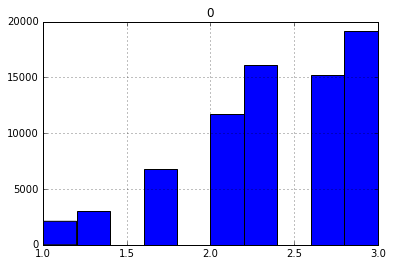

In [84]:
pd.DataFrame(y_train).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1148052d0>]], dtype=object)

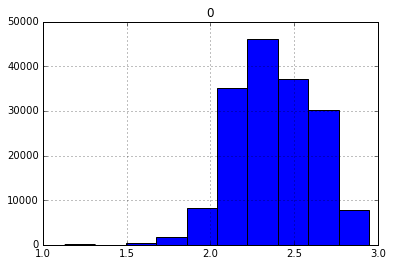

In [85]:
pd.DataFrame(y_pred).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1285ebd90>]], dtype=object)

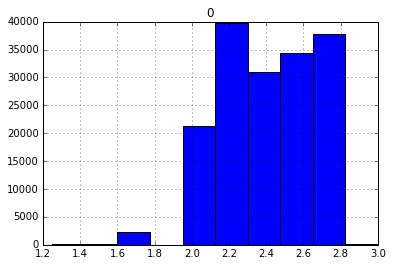

In [106]:
pd.DataFrame(y_pred_new).hist()

In [98]:
y_pred_new = y_pred.tolist()

In [102]:
for i in range(len(y_pred)):
    if y_pred[i] < 1.125:
        y_pred_new[i] = 1
    elif y_pred[i] < 1.29:
        y_pred_new[i] = 1.25
    elif y_pred[i] < 1.415:
        y_pred_new[i] = 1.33
    elif y_pred[i] < 1.585:
        y_pred_new[i] = 1.5
    elif y_pred[i] < 1.71:
        y_pred_new[i] = 1.67
    elif y_pred[i] < 1.875:
        y_pred_new[i] = 1.75
    elif y_pred[i] < 2.125:
        y_pred_new[i] = 2
    elif y_pred[i] < 2.29:
        y_pred_new[i] = 2.25
    elif y_pred[i] < 2.415:
        y_pred_new[i] = 2.33
    elif y_pred[i] < 2.585:
        y_pred_new[i] = 2.5
    elif y_pred[i] < 2.71:
        y_pred_new[i] = 2.67
    elif y_pred[i] < 2.875:
        y_pred_new[i] = 2.75
    else:
        y_pred_new[i] = 3       